# Принятие решений в бизнесе

## Описание исследования

В отделе маркетинга крупного интернет-магазина подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Загрузка данных и подготовка их к анализу

In [1]:
# импорт библиотеки pandas
# импорт библиотеки numpy
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_colwidth', None)

In [2]:
hypothesis = pd.read_csv('C:/Users/snaki/Downloads/hypothesis.csv')
orders = pd.read_csv('C:/Users/snaki/Downloads/orders.csv')
visitors = pd.read_csv('C:/Users/snaki/Downloads/visitors.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Анализ общей информации о датафреймах

In [3]:
def df_info(df):
    display(df.head(10))
    print(df.info())
    print('')
    print('Количество дубликатов:', df.duplicated().sum())

In [4]:
df_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Количество дубликатов: 0


В датафрейме **hypothesis** 5 столбцов и 9 строк

- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Дубликатов нет.

In [5]:
df_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Количество дубликатов: 0


В датафрейме **orders** 5 столбцов и 1197 строк

- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ; - **нужно изменить тип данных на date**
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

Дубликатов нет.

In [6]:
df_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Количество дубликатов: 0


В датафрейме **visitors** 3 столбца и 62 строки

- **date** — дата; - **нужно изменить тип данных на date**
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

Дубликатов нет.

### Приведение к нижнему регистру названий столбцов

In [7]:
def column_names_lowercase_conversion(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()

In [8]:
#в датафрейме hypothesis
column_names_lowercase_conversion(hypothesis)
df_info(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Количество дубликатов: 0


In [9]:
#в датафрейме orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
df_info(orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Количество дубликатов: 0


### Приведение столбцов с датами к формату времени

In [10]:
def data_conversion(df, column):
    df[column] = pd.to_datetime(df[column])
    
data_conversion(orders, 'date')
data_conversion(visitors, 'date')

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Часть 1. Приоритизация гипотез.

У нас 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Примените **фреймворк ICE** для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените **фреймворк RICE** для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, **как изменилась приоритизация гипотез при применении RICE вместо ICE**. Объясните, почему так произошло.


### Применение фреймворка ICE для приоритизации гипотез

In [11]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis_ice = hypothesis[['hypothesis', 'ice']]
display(hypothesis_ice.sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по **ICE: 9, 1, 8 и 7.**

### Применение фреймворка RICE для приоритизации гипотез

In [12]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_rice = hypothesis[['hypothesis', 'rice']]
display(hypothesis_rice.sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Сводная таблица гипотез с фреймворками ICE и RICE

In [13]:
hypothesis_ice_rice = hypothesis_ice.merge(hypothesis_rice, on='hypothesis', how='left')

numeric_columns = ['ice', 'rice']

display(
    hypothesis_ice_rice
    .sort_values(by=['rice', 'ice'], ascending=False)
    .style
    .background_gradient(cmap='Blues', axis=0)
    .set_precision(2)
    #.highlight_max(color='lightgreen', subset=numeric_columns)
    #.highlight_min(color='coral', subset=numeric_columns)
)

C:\Users\snaki\AppData\Local\Temp\ipykernel_14876\954885697.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  hypothesis_ice_rice


,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


Наиболее перспективные гипотезы по **RICE: 8, 3, 1 и 7.**

### Выводы по 1й части исследования

В результате применения **фреймворка ICE** мы получили следующие гипотезы, как наиболее перспективные:

- Запустить акцию, дающую скидку на товар в день рождения
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**
- **Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**

В результате применения **фреймворка RICE** мы получили следующие гипотезы, как наиболее перспективные:

- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**
- Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**

Мы видим, что **3 гипотезы из 4х (выше выделены цветом)** стали лидирующими в обоих фреймворках. Единственно, они занимают разные места в рейтинге.

Если рассматривать лидирующие гипотезы из **ICE фреймворка**, мы видим, что **1-е место** занимает **гипотеза "Запустить акцию, дающую скидку на товар в день рождения"**. Это связано с тем, что у нее самые высокие оценки **влияния на пользователей (9 баллов), уверенность в оценке (9 баллов), а также невысокая оценка затрат на ее проверку (5 баллов)**.

По результатам использования **RICE фреймворка**, **гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** заняла **первое место**, а гипотеза "Запустить акцию, дающую скидку на товар в день рождения" даже не попала в список лидеров. Это произошло из-за того, что в формуле RICE учитывается параметр **Reach**, который определяет охват (количество) потребителей, которых коснется проверка данной гипотезы. И у **гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** этот параметр **максимальный (10 из 10ти)**, а у **гипотезы "Запустить акцию, дающую скидку на товар в день рождения"** - 1 из 10, т.е. **минимальный**.


## Часть 2. Анализ A/B-теста

**Проанализируйте A/B-тест:**

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Предварительная проверка полученных данных A/B теста (A/A тест)

**Критерии успешного A/A-теста:**
-	Количество пользователей в различных группах различается не более, чем на 1%;
-	Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
-	Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
-	Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.


#### Проверка количества пользователей в различных группах

In [14]:
group_a = orders.query('group == "A"')
count_visitors_a = group_a['visitor_id'].nunique()
group_b = orders.query('group == "B"')
count_visitors_b = group_b['visitor_id'].nunique()
groups_comparison = count_visitors_b / count_visitors_a - 1
print('Количество пользователей в группе A:', count_visitors_a)
print()
print('Количество пользователей в группе B:', count_visitors_b)
print()
print('Кол-во пользователей в группе B больше кол-ва пользователей группы A на:', f'{groups_comparison:.0%}')

Количество пользователей в группе A: 503

Количество пользователей в группе B: 586

Кол-во пользователей в группе B больше кол-ва пользователей группы A на: 17%


#### Проверка "деления" трафика

In [15]:
both_users = orders.groupby('visitor_id')['group'].nunique().reset_index().query('group > 1')
both_users['flag'] = 1
print('Количество повторяющихся пользователей в группах A и B равно:', both_users['flag'].count())

Количество повторяющихся пользователей в группах A и B равно: 58


В процессе предварительной проверки были выявлены следующие недочеты исходных данных A/B теста:
- **Количество пользователей в группах A и B** различается более, чем на 1% **(на 17%)**.
- **Количество повторяющихся пользователей** в группах A и B составляет **58 человек.**

Данные недочеты **не допустимы** при проведении A/B теста. По-хорошему, необходимо прервать тестирование, так как его результаты будут некорректные. Но так как у нас нет возможности получить иные данные, продолжим оценивать имеющиеся. Я удалю повторяющихся пользователей из групп для получения более корректных результатов.

In [16]:
#удаление повторяющихся пользователей из датафрейма orders
orders = orders.merge(both_users, on='visitor_id', how='left')
orders = orders[orders['flag'] != 1]
del orders['group_y']
del orders['flag']

orders.head(5)

,transaction_id,visitor_id,date,revenue,group_x
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [17]:
#переименуем столбцы полученного датафрейма orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.head(5)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Теперь посчитаем суммарное число пользователей и заказов в каждой из групп теста. 
Найдём отношение числа заказов к количеству пользователей в каждой группе.

In [18]:
data_new = (
    orders.groupby('group', as_index=False)
    .agg({'visitor_id': 'count', 'revenue': 'sum'})
)
data_new['revenue_to_visitors_ratio'] = (
    data_new['revenue'] / data_new['visitor_id']
).map(lambda x: "{0:.2f}".format(x))

print(data_new)

  group  visitor_id  revenue revenue_to_visitors_ratio
0     A         468  3364656                   7189.44
1     B         548  5068972                   9249.95


По полученному датафрейму мы видим, что **отношение выручки к посетителям в группе B значительно выше, чем в группе A.** И это очень хороший результат.

### Подготовка к A/B тесту

In [19]:
#Создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 
display(dates_groups.head(6))

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B


In [20]:
#Соберём агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1
).sort_values(by=['date','group']) 
display(orders_aggregated.head(10))

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850
499,2019-08-04,A,77,71,388030
498,2019-08-04,B,68,66,385740
719,2019-08-05,A,99,92,474413
699,2019-08-05,B,89,87,475648


In [21]:
#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
).sort_values(by=['date','group']) 
display(visitors_aggregated.head(10))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
719,2019-08-05,A,3318
699,2019-08-05,B,3280


In [22]:
#Объединим обе таблицы в одну 
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


### График кумулятивной выручки по группам

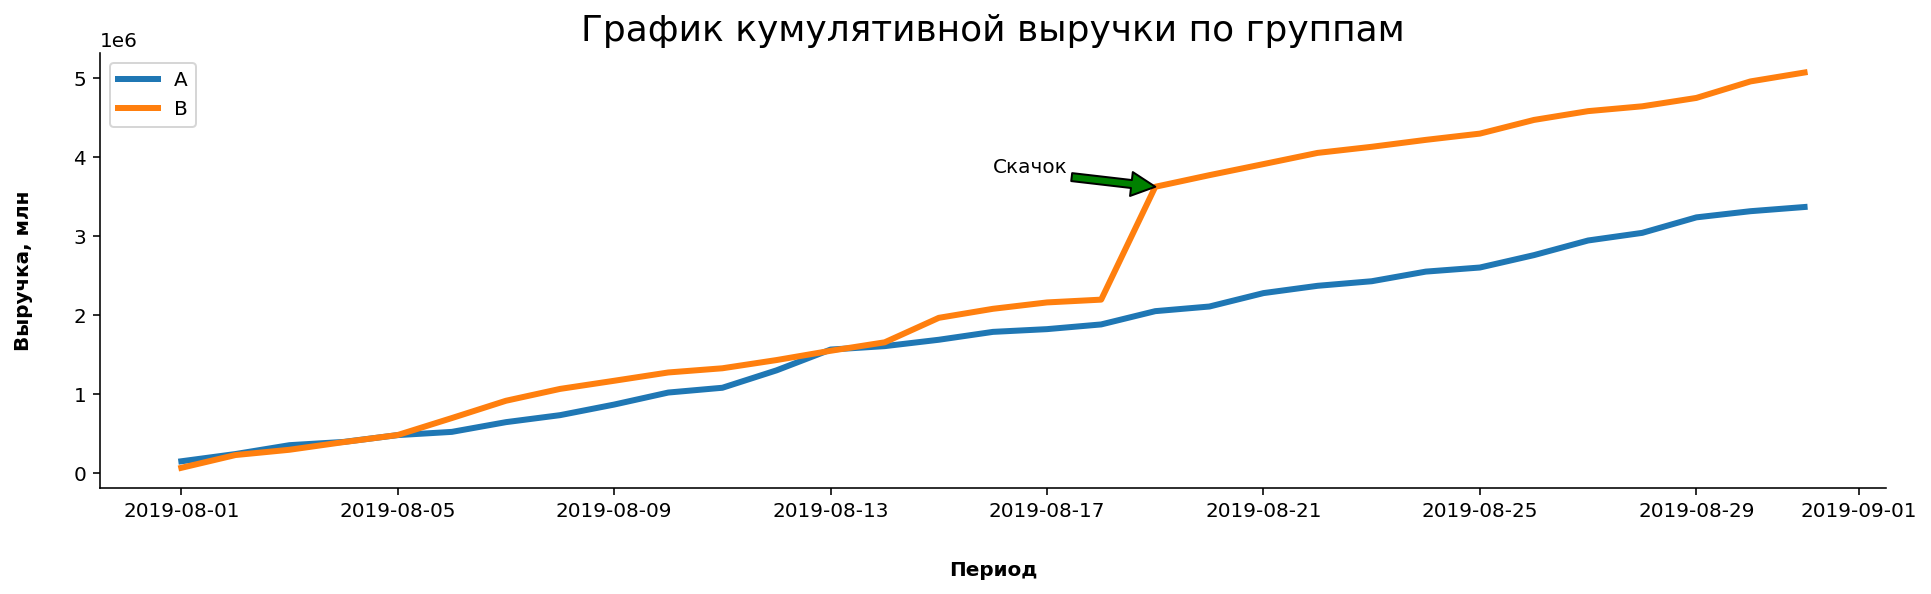

In [23]:
plt.figure(figsize=(16, 4))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A', linewidth=3)

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B', linewidth=3)
plt.title('График кумулятивной выручки по группам', fontsize=18)

plt.xlabel("Период", labelpad=20, weight='bold', size=10)
plt.ylabel("Выручка, млн", labelpad=20, weight='bold', size=10)

plt.annotate('Скачок', xy=(datetime(2019, 8, 19), 3620785), xytext=(datetime(2019, 8, 16), 3800000), arrowprops=dict(facecolor='g'))

plt.legend() 
sns.despine()

Выручка почти равномерно увеличивается в течение всего теста, что хорошо. Однако, в одной точке **(в период с 17 по 21 августа 2019 г.) график группы B резко возрастает.** Это может быть связано **со всплеском числа заказов, либо о нескольких очень дорогих заказов в выборке.**

### График кумулятивного среднего чека по группам

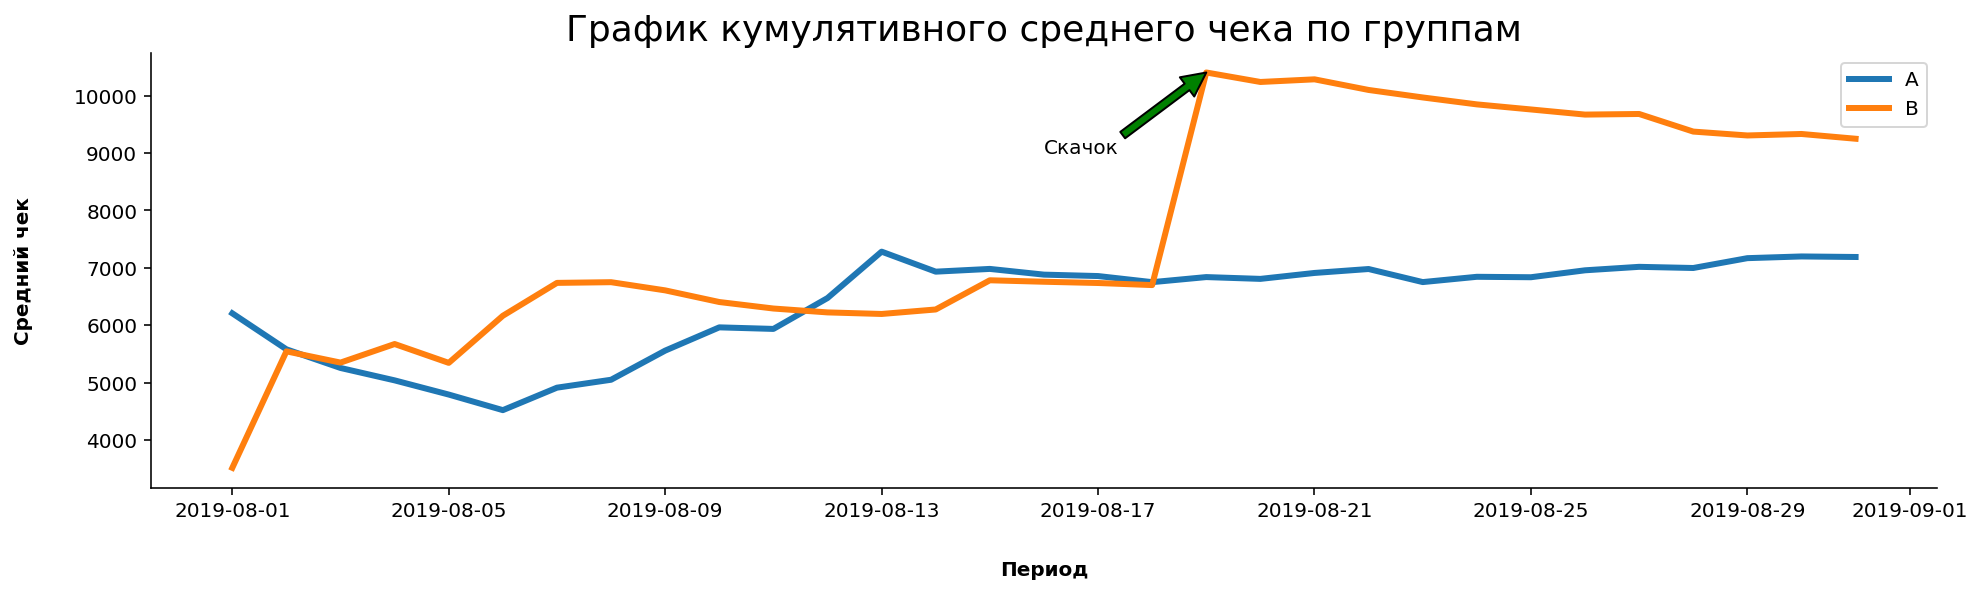

In [24]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(16, 4))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='A', linewidth=3)
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='B', linewidth=3)
plt.title('График кумулятивного среднего чека по группам', fontsize=18)
plt.xlabel("Период", labelpad=20, weight='bold', size=10)
plt.ylabel("Средний чек", labelpad=20, weight='bold', size=10)

plt.annotate('Скачок', xy=(datetime(2019, 8, 19), 10404), xytext=(datetime(2019, 8, 16), 9000), arrowprops=dict(facecolor='g'))

plt.legend() 
sns.despine()

Действительно, в период с 17го по 21е августа 2019 мы видим **резкий рост среднего чека в группе B (что означает наличие крупных заказы в группе B).**

### График относительного изменения кумулятивного среднего чека группы B к группе A

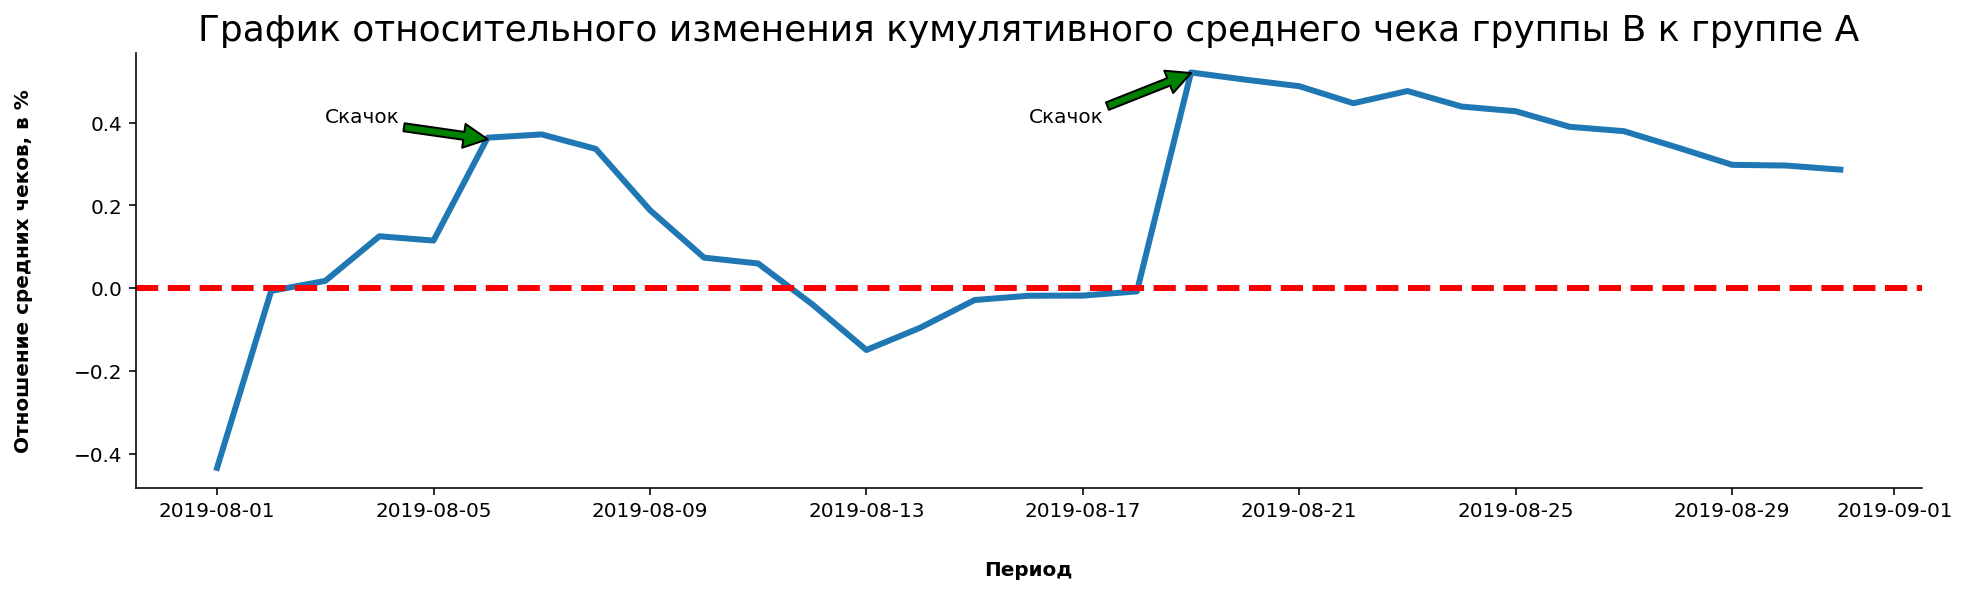

In [25]:
#Построим график относительного различия для среднего чека
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.columns = ['date', 'revenue_a', 'orders_a', 'revenue_b', 'orders_b']

# cтроим отношение средних чеков
plt.figure(figsize=(16, 4))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1, linewidth=3)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--', linewidth=3) 

plt.xlabel("Период", labelpad=20, weight='bold', size=10)
plt.ylabel("Отношение средних чеков, в %", labelpad=20, weight='bold', size=10)
plt.annotate('Скачок', xy=(datetime(2019, 8, 19), 0.52), xytext=(datetime(2019, 8, 16), 0.4), arrowprops=dict(facecolor='g'))
plt.annotate('Скачок', xy=(datetime(2019, 8, 6), 0.36), xytext=(datetime(2019, 8, 3), 0.4), arrowprops=dict(facecolor='g'))

sns.despine()

На бОльшем диапазоне рассматриваемого периода **кумулятивный средний чек группы B превышает чек группы A.** При этом, **в нескольких точках график скачет, что означает наличие выбросов (крупных заказов).**

### График кумулятивной конверсии по группам

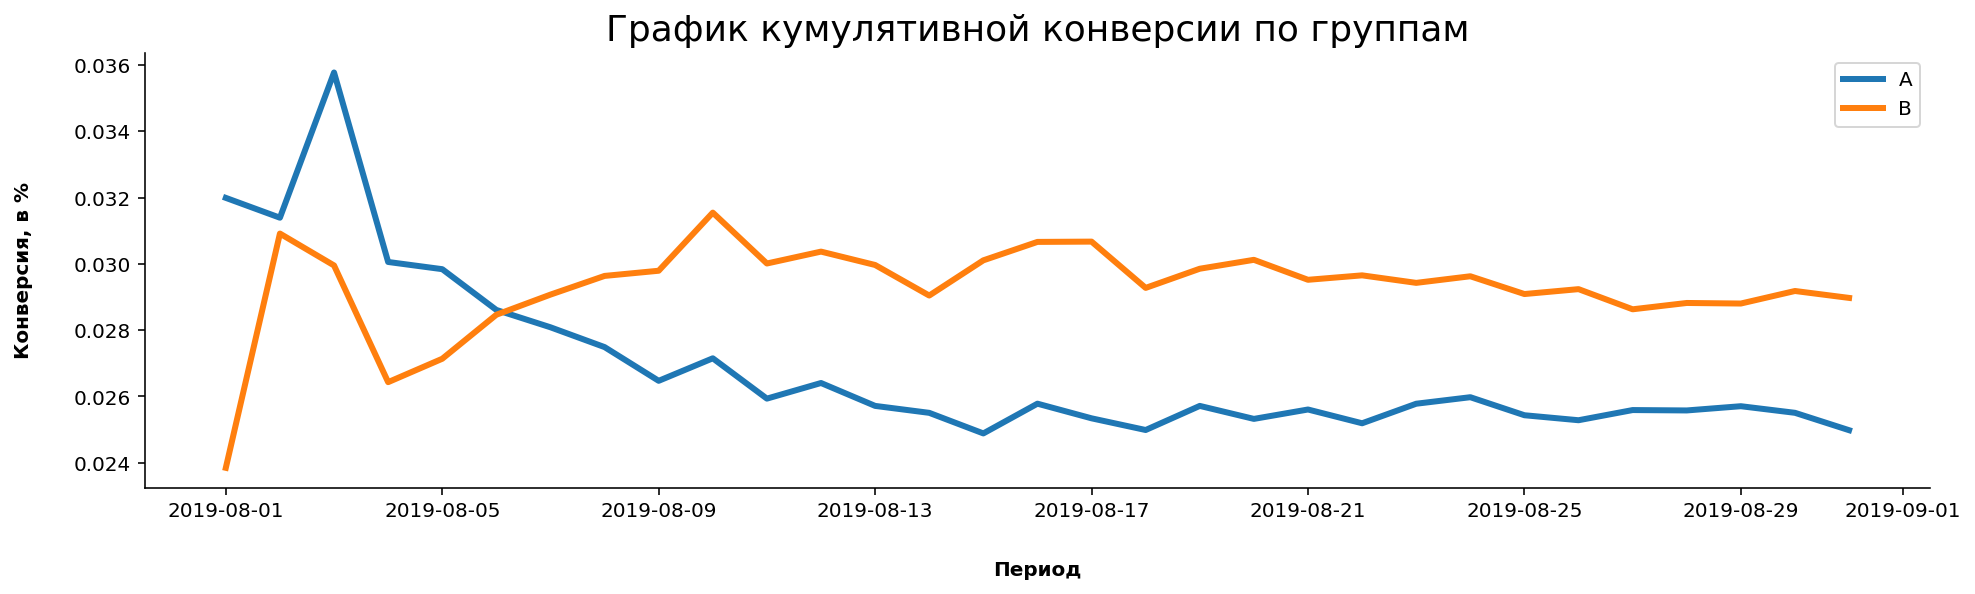

In [26]:
#Аналогично проанализируем график кумулятивной конверсии
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(16, 4))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A', linewidth=3)
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B', linewidth=3)
plt.title('График кумулятивной конверсии по группам', fontsize=18)
plt.xlabel("Период", labelpad=20, weight='bold', size=10)
plt.ylabel("Конверсия, в %", labelpad=20, weight='bold', size=10)

plt.legend()

sns.despine()

Как и предполагалось, в начале периода график кумулятивной конверсии скачет по обеим группам, но к концу периода они более-менее выравниваются и представляют собой следующую картину: **средняя конверсия группы B выше группы A и находится на уровне 2,9% (против 2,5% у конверсии группы A).**

### График относительного изменения кумулятивной конверсии группы B к группе A

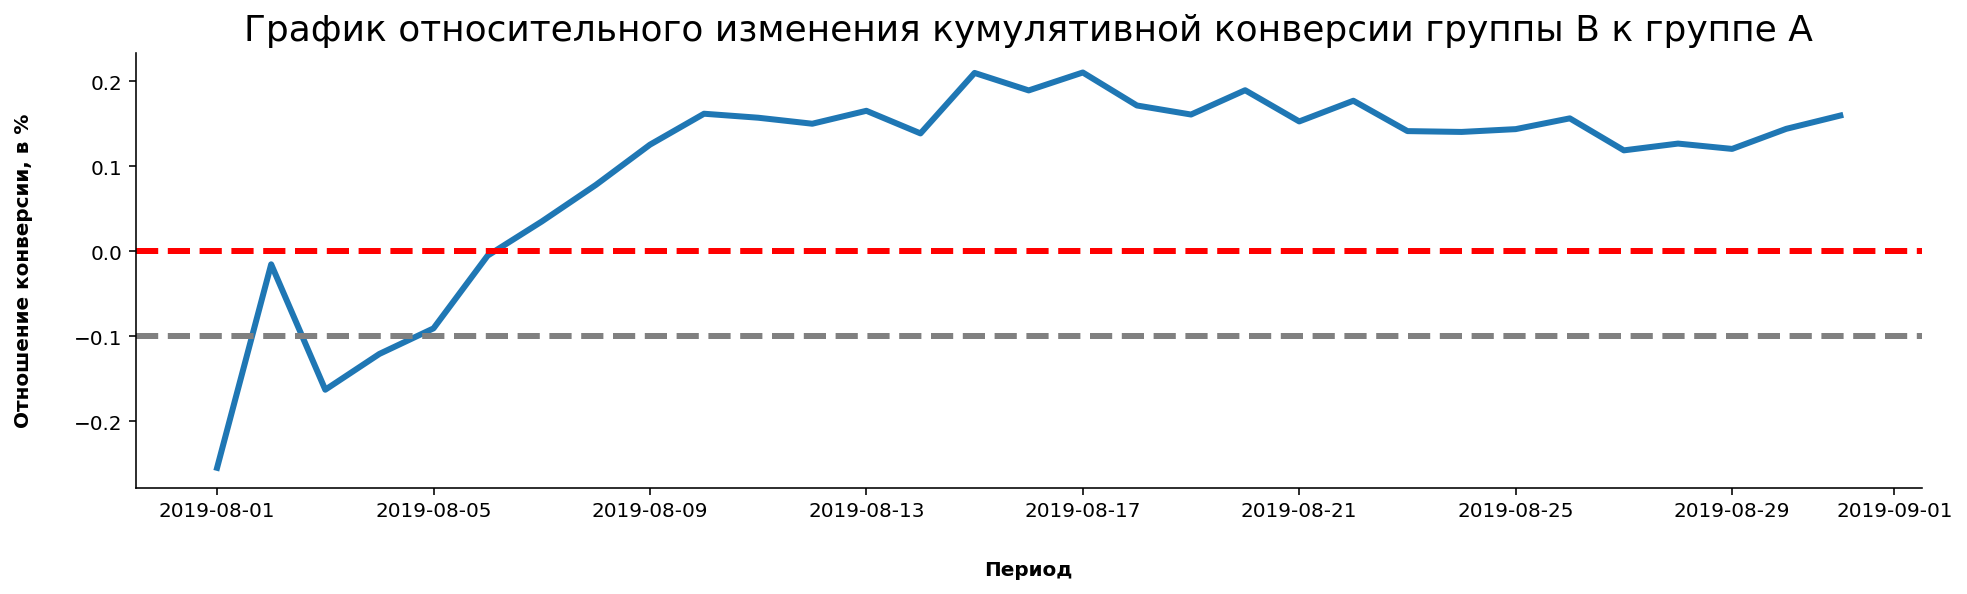

In [27]:
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 4))
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A", linewidth=3)

plt.axhline(y=0, color='red', linestyle='--', linewidth=3)
plt.axhline(y=-0.1, color='grey', linestyle='--', linewidth=3)
plt.title('График относительного изменения кумулятивной конверсии группы В к группе А', fontsize=18)
plt.xlabel("Период", labelpad=20, weight='bold', size=10)
plt.ylabel("Отношение конверсии, в %", labelpad=20, weight='bold', size=10)

sns.despine()

В начале периода конверсия группы B проигрывала конверсии группы A. Но где-то с 6го августа она вырвалась вперед и с хорошим темпом росла. **Во второй половине временного периода конверсия более-менее сбалансировалась и находилась в диапазоне 1-2%.**

### Точечный график количества заказов по пользователям

In [28]:
#Подсчитаем количество заказов по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']
display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


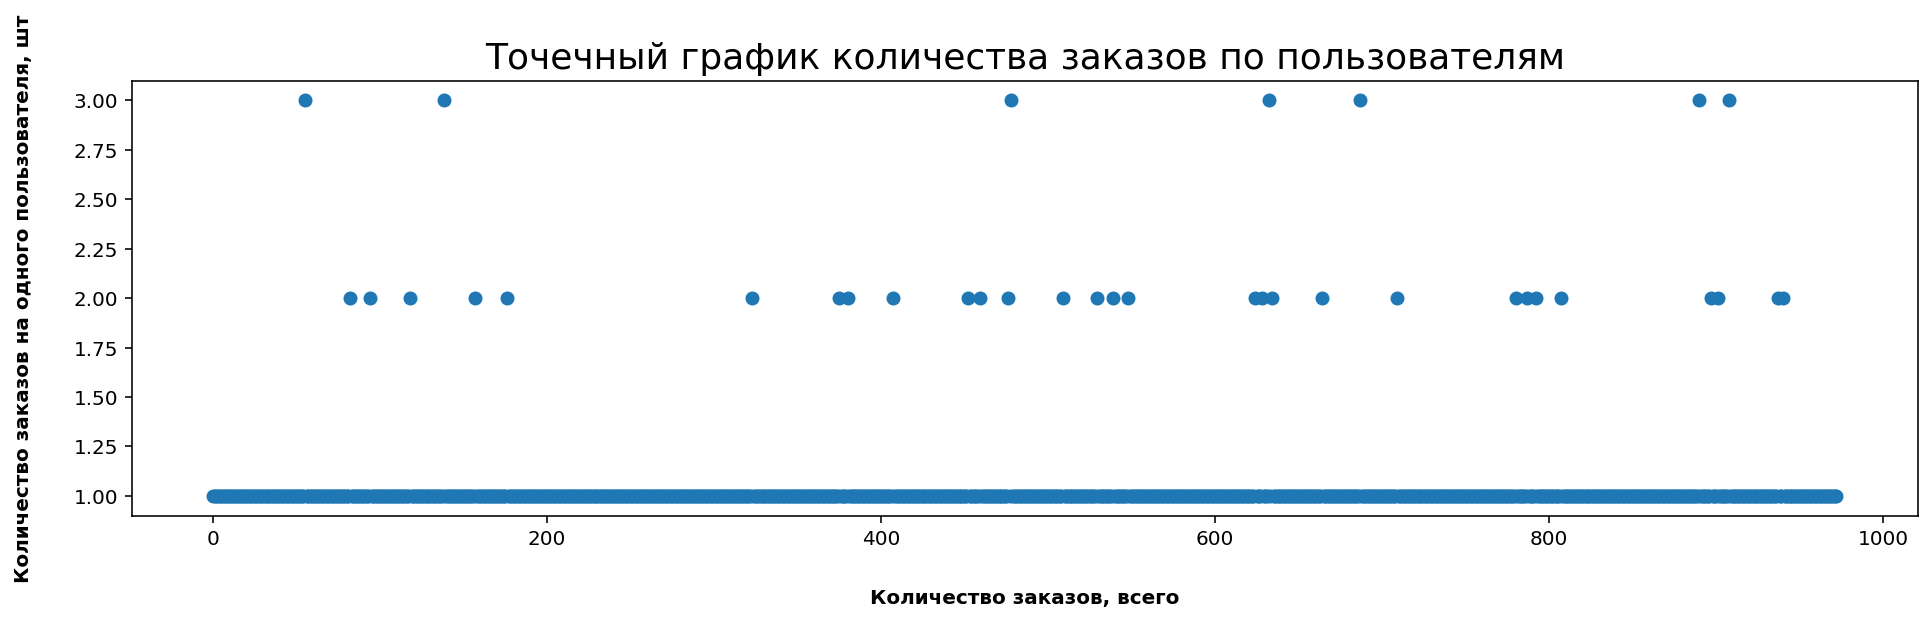

<Figure size 432x288 with 0 Axes>

In [29]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(16, 4))
plt.scatter(x_values, orders_by_users['orders']) 


plt.title('Точечный график количества заказов по пользователям', fontsize=18)
plt.xlabel("Количество заказов, всего", labelpad=20, weight='bold', size=10)
plt.ylabel("Количество заказов на одного пользователя, шт", labelpad=20, weight='bold', size=10)

plt.show()
sns.despine()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна. **Всего 7 клиентов с 3мя заказами.**

### 95-я и 99-я перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [30]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


**Не более 1% пользователей оформляли больше 2 заказов (включительно).** Разумно выбрать **1 заказ** на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Точечный график стоимостей заказов

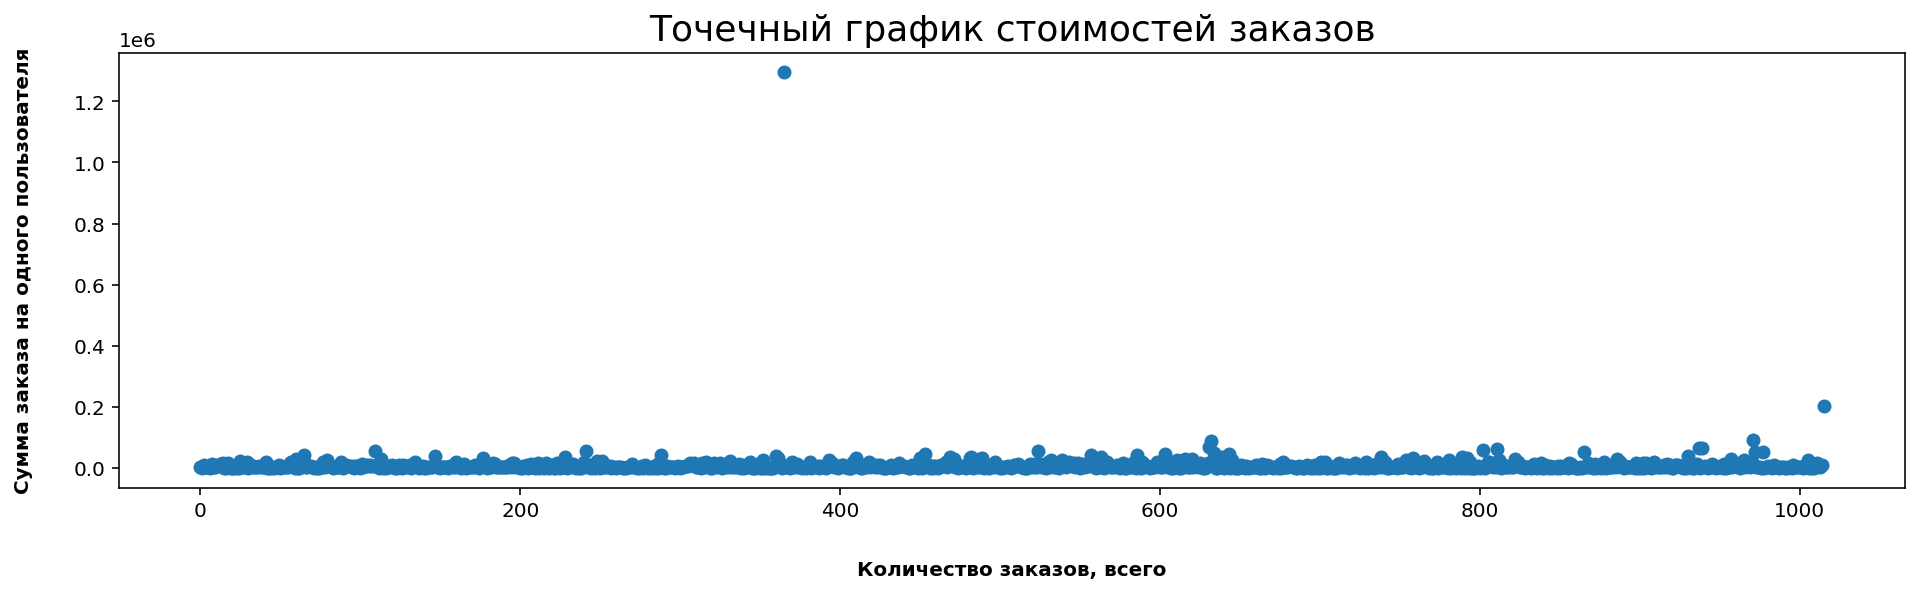

<Figure size 432x288 with 0 Axes>

In [31]:
#Построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(16, 4))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов', fontsize=18)
plt.xlabel("Количество заказов, всего", labelpad=20, weight='bold', size=10)
plt.ylabel("Сумма заказа на одного пользователя", labelpad=20, weight='bold', size=10)


plt.show()
sns.despine()

На графике мы видим **2 выброса: в районе 200 тысяч и около 1,3 млн** (в задании не указана валюта заказов).

### 95-я и 99-я перцентили стоимости заказов. Выбор границы для определения аномальных заказов

In [32]:
#Посчитаем выборочные перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более чем у **5% заказов стоимость превышает 26785** и не более чем у **1% заказов стоимость больше 53904.**

### Статистическая значимость различий в конверсии и в среднем чеке между группами по «сырым» данным

#### Подготовка «сырых» данных

In [33]:
#подготовим данные
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = [
    'date', 
    'orders_per_date_a', 
    'revenue_per_date_a'
]

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Напомним названия столбцов данных:
-	**date** — дата;
-	**orders_per_date_a** — количество заказов в выбранную дату в группе A;
-	**revenue_per_date_a** — суммарная выручка в выбранную дату в группе A;
-	**orders_per_date_b** — количество заказов в выбранную дату в группе B;
-	**revenue_per_date_b** — суммарная выручка в выбранную дату в группе B;
-	**orders_cummulative_a** — суммарное число заказов до выбранной даты включительно в группе A;
-	**revenue_cummulative_a** — суммарная выручка до выбранной даты включительно в группе A;
-	**orders_cummulative_b** — суммарное количество заказов до выбранной даты включительно в группе B;
-	**revenue_cummulative_b** — суммарная выручка до выбранной даты включительно в группе B;
-	**visitors_per_date_a** — количество пользователей в выбранную дату в группе A;
-	**visitors_per_date_b** — количество пользователей в выбранную дату в группе B;
-	**visitors_cummulative_a** — количество пользователей до выбранной даты включительно в группе A;
-	**visitors_cummulative_b** — количество пользователей до выбранной даты включительно в группе B.


#### Расчет статистической значимости различия конверсии между группами

Сформулируем гипотезы. 

**Нулевая:** различий в конверсии между группами нет. 

**Альтернативная:** различия в конверсии между группами есть.

In [34]:
#Посчитаем статистическую значимость различия в конверсии между группами

#В переменных укажем число совершенных заказов пользователями, которые заказывали хотя бы 1 раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

#Объявим переменные sample_a и sample_b,
#в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули.
#Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sample_a = pd.concat(
    [orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],
    axis=0
)

sample_b = pd.concat(
    [orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')]
    ,axis=0
) 

#Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей
print("{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

#Выведем относительный прирост конверсии группы B
print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.011
0.160


По **«сырым»** данным видно, что есть **большие различия** в конверсии групп A и B.
Первое число — p-value = 0.011 значительно меньше 0.05. Значит, **нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет, **мы отвергаем**. **Прирост конверсии группы B относительно группы А составляет 16%.**

#### Расчет статистической значимости различия в среднем чеке заказа между группами

Сформулируем гипотезы. 

**Нулевая:** различий в среднем чеке между группами нет.

**Альтернативная:** различия в среднем чеке между группами есть.

In [35]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


**P-value значительно больше 0.05**. Значит, **причин отвергать нулевую гипотезу** и считать, что в среднем чеке есть различия, **нет**. При этом, средний чек **у группы B все же значительно больше среднего чека группы A (на 29%).**

### Статистическая значимость различий в конверсии и в среднем чеке между группами по «очищенным» данным

#### Подготовка «очищенных» данных

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 785 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей **с числом заказов больше 1 — users_with_many_orders** и пользователей, совершивших **заказы дороже 26 785 — users_with_expensive_orders**. Объединим их **в таблице abnormal_users**.

In [36]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 1]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head(5))
print(abnormal_users.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
86


**Всего 86 аномальных пользователей.**

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

In [37]:
#Подготовим выборки количества заказов по пользователям по группам теста
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#### Расчет статистической значимости различия конверсии между группами

In [38]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

0.016
0.174


**Результаты по конверсии практически не изменились.**

#### Расчет статистической значимости различия в среднем чеке заказа между группами

In [39]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.034


**P-value немного снизился в сравнении с "сырыми" данными (с 83% до 72.7%), но все равно значительно больше 0.05**. Значит, **причин отвергать нулевую гипотезу** и считать, что в среднем чеке есть различия, **нет**. Что же касается сравнения среднего чека, то **у группы B он ушел с 29% в минус 3.4% относительно среднего чека группы A.**

### Выводы по 2й части исследования

Необходимо принять решение по результатам теста и объяснить его. 

**Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

В процессе предварительной проверки были выявлены следующие недочеты исходных данных A/B теста:
- **Количество пользователей в группах A и B** различается более, чем на 1% **(на 17%)**.
- **Количество повторяющихся пользователей** в группах A и B составляет **58 человек.**

Данные недочеты **не допустимы** при проведении A/B теста. По-хорошему, изначально необходимо было прервать тестирование, так как его результаты в последствии были некорректные. Но так как у нас нет возможности получить иные данные, мы продолжили оценивать имеющиеся.

Итак,
- Мы определили по "сырым" данным (а также подтвердили это после фильтрации аномалий), что **статистически значимые различия в конверсии между группами есть**. **Прирост конверсии группы B относительно группы А в "сырых" данных составляет 16%, а в "очищенных" - 17.4%.**

- Если оценивать средний чек, то по "сырым" данным мы **не нашли различий в среднем чеке** (p-value значительно больше 0.05, т.е. нулевая гипотеза не была отвергнута). То же самое подтвердили "очищенные" данные (p-value снизился с 83% до 72.7%, но все равно оказался большел 5%). 

- При этом, согласно "сырым" данным, **средний чек у группы B все же значительно больше среднего чека группы A (на 29%).** После удаления аномалий мы вдруг увидели, что **средний чек группы В упал ниже среднего чека группы А (на 3.4%).** Это значит, что среди заказов **группы В были крупные заказы, которые исказили нам первоначальные данные.**

- Если рассматривать показатели в динамике, то график различия среднего чека показывает, что на бОльшем диапазоне рассматриваемого периода **кумулятивный средний чек группы B превышает чек группы A.**

- График различия конверсии между группами сообщает, что в самом начале исследуемого периода конверсия группы B проигрывала конверсии группы A. Но с 6го августа она вырвалась вперед и с хорошим темпом росла. **Во второй половине временного периода конверсия более-менее сбалансировалась и находилась в диапазоне 1-2%.**

**Продолжать тест смысла нет:** график конверсии стабилизировался во второй половине рассматриваемого периода; группа В статистически лучше группы А по конверсии. Несмотря на то, что средний чек в "очищенных" данных у нас снизился в группе В в сравнении с группой А, **я считаю, что за счет улучшенной конверсии (количества платящих пользователей), тест можно признать успешным.**

## Общие выводы к проекту

Перед началом исследования мы загрузили данные и провели предварительную их проверку, а именно: 

- выявили столбцы с данными, которые нужно привести к формату времени; 
- привели названия столбцов к нижнему регистру; 
- проверили данные на дубликаты (они отсутствовали). 

Далее исследование у нас состояло из 2х частей:

- приоритезации гипотез
- анализ А/В теста

**В первом разделе приоритезации гипотез** мы применили **2 фреймворка (ICE, RICE)** и выявили следующие гипотезы, как **наиболее перспективные:**

- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**
- **Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**

Они пересекались по обоим фреймворкам.


Далее мы приступили **ко второй части исследования.**

Перед тем, как анализировать результаты А/В теста, мы провели предварительную проверку полученных данных, в процессе которой были выявлены следующие недочеты исходных данных A/B теста:

- **Количество пользователей в группах A и B** различается более, чем на 1% **(на 17%)**.
- **Количество повторяющихся пользователей** в группах A и B составляет **58 человек.**

Данные недочеты **не допустимы** при проведении A/B теста. По-хорошему, изначально необходимо было прервать тестирование, так как его результаты в последствии были некорректные. Но так как у нас нет возможности получить иные данные, мы продолжили оценивать имеющиеся.



При **оценке кумулятивной выручки по группам**, мы увидели, что она почти равномерно увеличивается в течение всего теста, что хорошо. Однако, в одной точке **(в период с 17 по 21 августа 2019 г.) график группы B резко возрастает.** Это может быть связано **со всплеском числа заказов, либо о нескольких очень дорогих заказов в выборке.**

При рассмотрении **кумулятивного среднего чека по группам** мы увидели в период с 17го по 21е августа 2019 г. **резкий рост среднего чека в группе B (что означает наличие крупных заказы в группе B).**

При исследовании **относительного изменения кумулятивного среднего чека группы В к группе А** мы отметили, что на бОльшем диапазоне рассматриваемого периода **кумулятивный средний чек группы B превышает чек группы A.** При этом, **в нескольких точках график скачет, что означает наличие выбросов (крупных заказов).**

В процессе анализа **кумулятивной конверсии по группам**, мы отметили, что в начале периода график кумулятивной конверсии скачет по обеим группам, но к концу периода они более-менее выравниваются и представляют собой следующую картину: **средняя конверсия группы B выше группы A и находится на уровне 2,9% (против 2,5% у конверсии группы A).**

При оценке **относительного изменения кумулятивной конверсии группы В к группе А**, нами было замечено, что в начале периода конверсия группы B проигрывала конверсии группы A. Но где-то с 6го августа она вырвалась вперед и с хорошим темпом росла. **Во второй половине временного периода конверсия более-менее сбалансировалась и находилась в диапазоне 1-2%.**

**Точечный график количества заказов по пользователям** показал нам, что большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна. **Всего 7 клиентов с 3мя заказами.**

Также мы оценили **95-ю и 99-ю перцентили количества заказов на пользователя** и выбрали границу, по которой проходят аномальные пользователи: **не более 1% пользователей оформляли больше 2 заказов (включительно).** За нижнюю границу числа заказов мы выбрали **1 заказ** на одного пользователя и отсеяли аномальных пользователей по ней. 

**Точечный график стоимостей заказов** показал нам **2 выброса: в районе 200 тысяч и около 1,3 млн** (в задании не указана валюта заказов).

Также мы оценили **95-ю и 99-ю перцентили стоимости заказов** и выбрали границу, по которой проходят аномальные заказы: не более чем у **5% заказов стоимость превышает 26785.**

Итак,
- Мы определили по "сырым" данным (а также подтвердили это после фильтрации аномалий), что **статистически значимые различия в конверсии между группами есть**. **Прирост конверсии группы B относительно группы А в "сырых" данных составляет 16%, а в "очищенных" - 17.4%.**

- Если оценивать средний чек, то по "сырым" данным мы **не нашли различий в среднем чеке** (p-value значительно больше 0.05, т.е. нулевая гипотеза не была отвергнута). То же самое подтвердили "очищенные" данные (p-value снизился с 83% до 72.7%, но все равно оказался большел 5%). 

- При этом, согласно "сырым" данным, **средний чек у группы B все же значительно больше среднего чека группы A (на 29%).** После удаления аномалий мы вдруг увидели, что **средний чек группы В упал ниже среднего чека группы А (на 3.4%).** Это значит, что среди заказов **группы В были крупные заказы, которые исказили нам первоначальные данные.**

- Если рассматривать показатели в динамике, то график различия среднего чека показывает, что на бОльшем диапазоне рассматриваемого периода **кумулятивный средний чек группы B превышает чек группы A.**

- График различия конверсии между группами сообщает, что в самом начале исследуемого периода конверсия группы B проигрывала конверсии группы A. Но с 6го августа она вырвалась вперед и с хорошим темпом росла. **Во второй половине временного периода конверсия более-менее сбалансировалась и находилась в диапазоне 1-2%.**

**Продолжать тест смысла нет:** график конверсии стабилизировался во второй половине рассматриваемого периода; группа В статистически лучше группы А по конверсии. Несмотря на то, что средний чек в "очищенных" данных у нас снизился в группе В в сравнении с группой А, **я считаю, что за счет улучшенной конверсии (количества платящих пользователей), тест можно признать успешным.**